# Animated Scatter Plot

Reproduction of Hans Rosling’s famous animation.
https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen

Data Source: https://www.gapminder.org/data/

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import imageio

## Read data

In [ ]:
fertility_df = pd.read_csv('data/spiced/gapminder_total_fertility.csv', index_col=0)
lifeexp_df = pd.read_excel('data/spiced/gapminder_lifeexpectancy.xlsx')
population_df = pd.read_excel('data/spiced/gapminder_population.xlsx')
continents_df = pd.read_csv('data/spiced/continents.csv', sep=';')

The following is overengineered for this specific case.

It could have also been done with `df.set_axis(df.columns.astype(int), axis=1)` or `df.columns = df.columns.astype(int)`

In [ ]:
def to_int_if_possible(item):
    try:
        return int(item)
    except ValueError:
        return item

fertility_df.set_axis(fertility_df.columns.map(to_int_if_possible), axis=1, inplace=True)

In [ ]:
fertility_df.index.rename('country', inplace=True) # alternative: df.index.name = 'country'
fertility_df.head()

In [ ]:
lifeexp_df.rename(columns={'Life expectancy':'country'}, inplace=True)
lifeexp_df.set_index('country', inplace=True)
lifeexp_df.head()

In [ ]:
population_df.rename(columns={'Total population':'country'}, inplace=True)
population_df.set_index('country', inplace=True)
population_df.head()

### Inspect shapes

In [ ]:
fertility_df.shape

In [ ]:
lifeexp_df.shape

In [ ]:
population_df.shape

In [ ]:
fertility_df.index

## Convert tables to long format

In [ ]:
fertility_df.reset_index(inplace=True)

In [ ]:
fertility_long_df = fertility_df.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [ ]:
fertility_long_df.shape

In [ ]:
population_df.reset_index(inplace=True)

In [ ]:
population_long_df = population_df.melt(id_vars='country', var_name='year', value_name='population')

In [ ]:
lifeexp_df.reset_index(inplace=True)

In [ ]:
lifeexp_long_df = lifeexp_df.melt(id_vars='country', var_name='year', value_name='life_expectancy')

## Merge tables

In [ ]:
df = fertility_long_df.merge(population_long_df)
df = df.merge(lifeexp_long_df)
df = df.merge(continents_df, on='country', how='left')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
sns.heatmap(df.isnull(), cbar = False)

## Plotting

### Sanity check

In [ ]:
sns.set()
df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
             data=df_subset)

In [ ]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
                data=df_subset, alpha=0.6)

### Famous scatter plot
#### Single frame
Hans Rosling projected:
  - fertility rate on x-ais
  - life expectancy on y-axis
  - population on bubble size.

In [ ]:
df_subset = df.loc[df['year'].eq(2015)]
df_subset.head()

In [ ]:
# look at population distribution
sns.boxplot(x=df['population'], showfliers=False) # without outliers
df['population'].describe()

In [ ]:
sns.set_theme(style='white')

In [ ]:
def plot_frame(ax, df, year, limits=(1, 8.6, 27, 85.2)):
    """ limits: (xmin, xmax, ymin, ymax) """
    
    year = int(year)
    df_subset = df.loc[ df['year'].eq(year) ]
    
    sns.scatterplot(  x     = 'fertility_rate'
                    , y     = 'life_expectancy'
                    , hue   = 'continent'
                    , size  = 'population'
                    , sizes = (15,700)
                    , size_norm = (50,1_000_000_000)
                    , data  = df_subset
                    , alpha = 0.6
                    , ax    = ax)
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    ax.set_xlabel('Fertility Rate')
    ax.set_ylabel('Life Expectancy')
    ax.set_title('Year: {}'.format(year))
    
    if limits is not None:
        ax.axis(limits)
    return ax.axis() # return current limits

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plot_frame(ax=ax, df=df, year=1960)
fig.savefig('test_frame.png', dpi=90, bbox_inches='tight')
ax

<AxesSubplot:title={'center':'Year: 1985'}, xlabel='Fertility Rate', ylabel='Life Expectancy'>

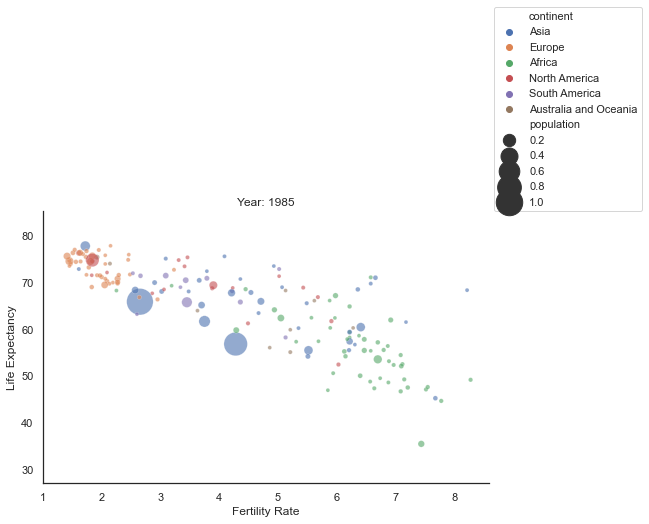

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
plot_frame(ax=ax, df=df, year=1985)
#fig.savefig('test_frame.png', dpi=90, bbox_inches='tight')
ax

#### Animation between 1960 and 2015

In [35]:
import imageio

images = []

for year in range(1960, 2015+1):
    filename = 'lifeexp_{}.png'.format(year)
    
    fig, ax = plt.subplots(figsize=(8,5))
    plot_frame(ax=ax, df=df, year=year)    
    fig.savefig(filename, dpi=90, bbox_inches='tight')    
    plt.close('all')
    print(filename, "written")
    
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

lifeexp_1960.png written
lifeexp_1961.png written
lifeexp_1962.png written
lifeexp_1963.png written
lifeexp_1964.png written
lifeexp_1965.png written
lifeexp_1966.png written
lifeexp_1967.png written
lifeexp_1968.png written
lifeexp_1969.png written
lifeexp_1970.png written
lifeexp_1971.png written
lifeexp_1972.png written
lifeexp_1973.png written
lifeexp_1974.png written
lifeexp_1975.png written
lifeexp_1976.png written
lifeexp_1977.png written
lifeexp_1978.png written
lifeexp_1979.png written
lifeexp_1980.png written
lifeexp_1981.png written
lifeexp_1982.png written
lifeexp_1983.png written
lifeexp_1984.png written
lifeexp_1985.png written
lifeexp_1986.png written
lifeexp_1987.png written
lifeexp_1988.png written
lifeexp_1989.png written
lifeexp_1990.png written
lifeexp_1991.png written
lifeexp_1992.png written
lifeexp_1993.png written
lifeexp_1994.png written
lifeexp_1995.png written
lifeexp_1996.png written
lifeexp_1997.png written
lifeexp_1998.png written
lifeexp_1999.png written
